- Importing libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import shapiro
import scipy.stats as stats

- Getting data

In [2]:
data = pd.read_csv("AdSmart.csv")
data

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
...,...,...,...,...,...,...,...,...,...
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0


- Checking and dealing with null values

In [3]:
data.isnull().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

In [4]:
#users that chose not to respond
missed_respond = data[(data['yes']==0) & (data['no']==0)]
len(missed_respond)

6834

In [5]:
data.drop(missed_respond.index, inplace = True)
data

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1
...,...,...,...,...,...,...,...,...,...
8059,ffa08ff9-a132-4051-aef5-01a9c79367bc,exposed,2020-07-05,21,Generic Smartphone,6,Chrome Mobile,1,0
8063,ffb176df-ecd2-45d3-b05f-05b173a093a7,exposed,2020-07-04,1,Generic Smartphone,6,Chrome Mobile,1,0
8064,ffb79718-6f25-4896-b6b3-e58b80a6e147,control,2020-07-09,7,Generic Smartphone,6,Chrome Mobile,0,1
8069,ffca1153-c182-4f32-9e90-2a6008417497,control,2020-07-10,16,Generic Smartphone,6,Chrome Mobile,0,1


- Data Manipulation 

In [6]:
#updating browswer column
data['browser'] = ['Chrome' if i in ['Chrome Mobile WebView', 'Chrome Mobile', 'Chrome', 'Chrome Mobile iOS'] else i for i in data['browser']]
data['browser'] = ['Safari' if i in ['Mobile Safari', 'Mobile Safari UI/WKWebView'] else i for i in data['browser']]

In [7]:
#updating device_make column
data.device_make.unique()

for k, i in enumerate(data.device_make):
    if 'Samsung' in i:
        data.iloc[k, 4] = 'Samsung'
    elif 'XiaoMi' in i:
        data.iloc[k, 4] = 'XiaoMi'
    elif 'OnePlus' in i:
        data.iloc[k, 4] = 'OnePlus'
    elif 'Nokia' in i:
        data.iloc[k, 4] = 'Nokia'
    elif 'ELE' in i:
        data.iloc[k, 4] = 'ELE'
    elif 'HTC' in i:
        data.iloc[k, 4] = 'HTC'
    elif 'Pixel' in i:
        data.iloc[k, 4] = 'Pixel'
    elif 'VFD' in i:
        data.iloc[k, 4] = 'VFD'
    elif 'VOG' in i:
        data.iloc[k, 4] = 'VOG'
    elif list(data.device_make).count(i) < 4:
        data.iloc[k, 4] = 'other'
    else:
        data.iloc[k, 4] = i

data.device_make.unique()      

array(['other', 'Generic Smartphone', 'Samsung', 'I3312', 'MRD-LX1',
       'Moto $2', 'ELE', 'VOG', 'LG-$2', 'ANE-LX1', 'POT-LX1', 'OnePlus',
       'HTC', 'iPhone', 'XiaoMi', 'Nokia', 'MAR-LX1A', 'CLT-L09', 'Pixel',
       'VFD'], dtype=object)

### Hypothesis:
  
  H0: there is no difference between success of new and old advertisment  
      Ha: there is difference between success of new and old advertisment

In [8]:
data.groupby('experiment')['yes','no'].sum()

C:\Users\olyad\AppData\Local\Temp\ipykernel_8468\3966141595.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('experiment')['yes','no'].sum()


,yes,no
experiment,,
control,264,322
exposed,308,349


In onther words:
    
    H0: p_control - p_exposed = 0
    Ha: p_control - p_exposed != 0
    where p is a proportion of yes to overall respond
As sample sizes are large: control_n = 586, exposed_n = 657. And we have numeric vs categorical, so we can use z-test to check our hypothesis.

In [9]:
from statsmodels.stats.proportion import proportions_ztest
import numpy as np

# can we assume anything from our sample
significance = 0.05

# our samples - 82% are good in one, and ~79% are good in the other
# note - the samples do not need to be the same size
sample_success_a, sample_size_a = (len(data[(data.experiment=='control') & (data.yes==1)]), len(data[data.experiment=='control']))
sample_success_b, sample_size_b = (len(data[(data.experiment=='exposed') & (data.yes==1)]), len(data[data.experiment=='exposed']))

# check our sample against Ho for Ha != Ho
successes = np.array([sample_success_a, sample_success_b])
samples = np.array([sample_size_a, sample_size_b])

# note, no need for a Ho value here - it's derived from the other parameters
stat, p_value = proportions_ztest(count=successes, nobs=samples,  alternative='two-sided')

# report
print('z_stat: %0.5f, p_value: %0.5f' % (stat, p_value))

if p_value > significance:
   print ("Fail to reject the null hypothesis - there is no difference between success of new and old advertisment")
else:
   print ("Reject the null hypothesis - there is difference between success of new and old advertisment")

z_stat: -0.64568, p_value: 0.51849
Fail to reject the null hypothesis - there is no difference between success of new and old advertisment


As we can see the p-value is too big too reject the null hypothesis 

#### Confidence interval

In [10]:
prop_a = sample_success_a / sample_size_a
prop_b = sample_success_b / sample_size_b

se_a = np.sqrt(prop_a * (1 - prop_a) / sample_size_a)
se_b = np.sqrt(prop_b * (1 - prop_b) / sample_size_b)
se = np.sqrt(se_a**2 + se_b**2)

# z critical value
confidence = 1 - significance
z = stats.norm(loc = 0, scale = 1).ppf(confidence + significance / 2)

# standard formula for the confidence interval
# point-estimtate +- z * standard-error
prop_diff = prop_a - prop_b
confint = prop_diff + np.array([-1, 1]) * z * se

print(z, confidence, confint)

1.959963984540054 0.95 [-0.07377294  0.0372017 ]


or

In [11]:
from statsmodels.stats.proportion import confint_proportions_2indep
confint_proportions_2indep(sample_success_a, sample_size_a, sample_success_b, sample_size_b, method="score", compare='diff', alpha=0.05, correction=True)

(-0.07359626403500129, 0.0372181096738865)

As we can see the 0 value is inside our confidence interval, so we can say that there is no significant difference between old and new advertisments



- Let's look at differnt features 

<AxesSubplot:xlabel='browser', ylabel='yes'>

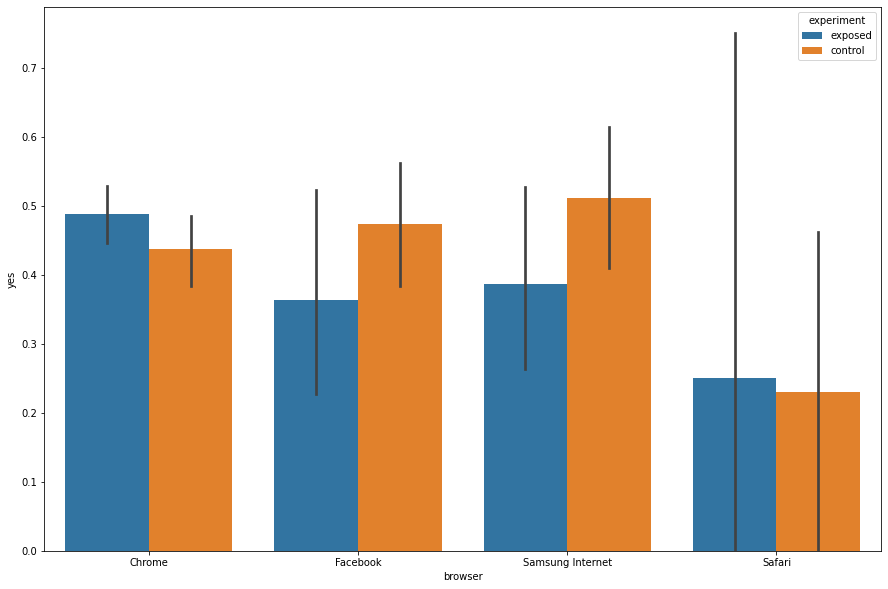

In [12]:
plt.figure(figsize=(15,10))
sns.barplot(data=data, x="browser", y="yes", hue="experiment")

We can see that there are some positive difference with chrome browser, so let's check if this difference is significant

H0: p_control_chrome - p_exposed_chrome = 0  
          Ha: p_control_chrome - p_exposed_chrome != 0

In [13]:
# can we assume anything from our sample
significance = 0.05

# our samples - 82% are good in one, and ~79% are good in the other
# note - the samples do not need to be the same size
chrome_success_a, chrome_size_a = (len(data[(data.browser=='Chrome') & (data.experiment=='control') & (data.yes==1)]), len(data[(data.browser=='Chrome') & (data.experiment=='control')]))
chrome_success_b, chrome_size_b = (len(data[(data.browser=='Chrome') & (data.experiment=='exposed') & (data.yes==1)]), len(data[(data.browser=='Chrome') & (data.experiment=='exposed')]))

# check our sample against Ho for Ha != Ho
successes_chrome = np.array([chrome_success_a, chrome_success_b])
samples_chrome = np.array([chrome_size_a, chrome_size_b])

# note, no need for a Ho value here - it's derived from the other parameters
stat_chrome, p_value_chrome = proportions_ztest(count=successes_chrome, nobs=samples_chrome,  alternative='two-sided')

# report
print('z_stat: %0.5f, p_value: %0.5f' % (stat_chrome, p_value_chrome))

if p_value_chrome > significance:
   print ("Fail to reject the null hypothesis - there is no difference between success of new and old advertisment")
else:
   print ("Reject the null hypothesis - there is difference between success of new and old advertisment")

z_stat: -1.50482, p_value: 0.13237
Fail to reject the null hypothesis - there is no difference between success of new and old advertisment


<AxesSubplot:xlabel='platform_os', ylabel='yes'>

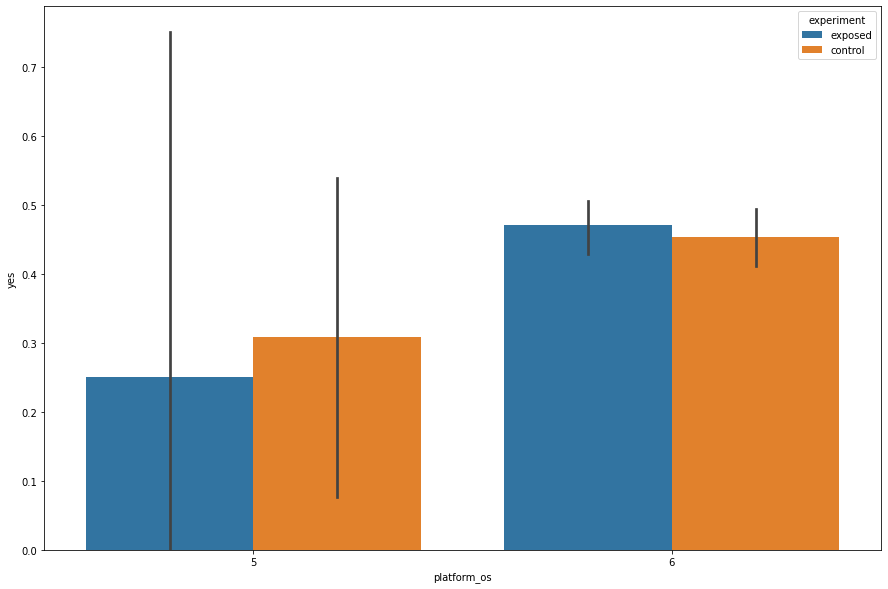

In [14]:
plt.figure(figsize=(15,10))
sns.barplot(data=data, x="platform_os", y="yes", hue="experiment")

There is no significant difference between values

<AxesSubplot:xlabel='device_make', ylabel='yes'>

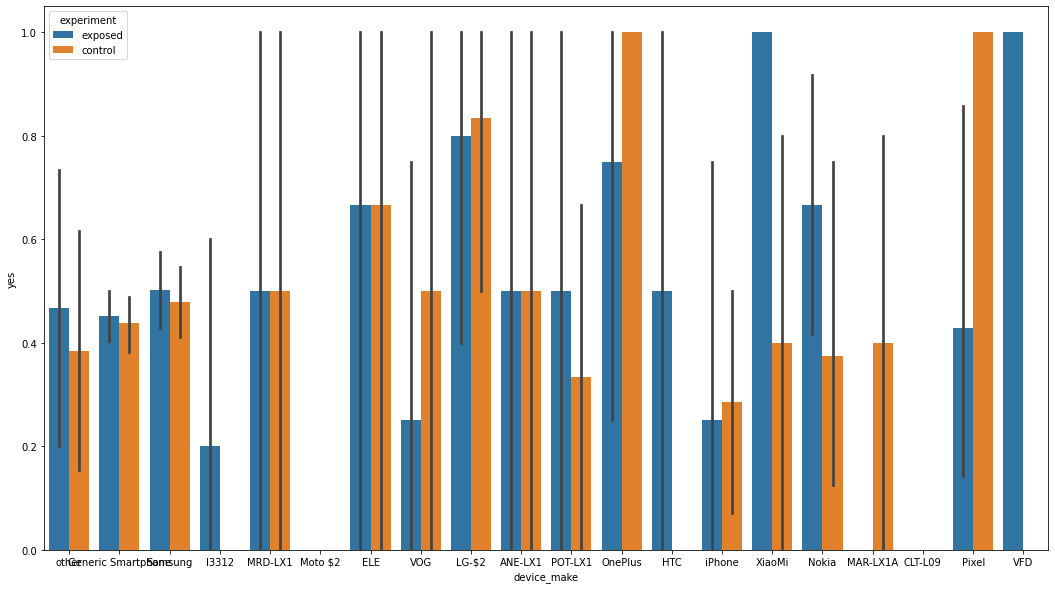

In [15]:
plt.figure(figsize=(18,10))
sns.barplot(data=data, x="device_make", y="yes", hue="experiment")

So as we can see we can check the 'other', 'POT-LX1', 'Xiaoma' devices

But firstly let's check the sizes of samles

In [16]:
data.groupby(['device_make', 'experiment'])['yes','no'].sum()

C:\Users\olyad\AppData\Local\Temp\ipykernel_8468\4294209550.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby(['device_make', 'experiment'])['yes','no'].sum()


yes   no
device_make        experiment          
ANE-LX1            control       2    2
                   exposed       1    1
CLT-L09            control       0    3
                   exposed       0    2
ELE                control       2    1
                   exposed       2    1
Generic Smartphone control     139  178
                   exposed     182  220
HTC                exposed       2    2
I3312              control       0    1
                   exposed       1    4
LG-$2              control       5    1
                   exposed       4    1
MAR-LX1A           control       2    3
                   exposed       0    1
MRD-LX1            control       1    1
                   exposed       1    1
Moto $2            exposed       0    4
Nokia              control       3    5
                   exposed       8    4
OnePlus            control       1    0
                   exposed       3    1
POT-LX1            control       2    4
                   exposed       1    1
Pixel              control       4    0
                   exposed       3    4
Samsung            control      91   99
                   exposed      89   88
VFD                control       0    2
                   exposed       1    0
VOG                control       1    1
                   exposed       1    3
XiaoMi             control       2    3
                   exposed       1    0
iPhone             control       4   10
                   exposed       1    3
other              control       5    8
                   exposed       7    8

As we can see the sample sizes are too small and there is no significant difference between values

### Conclusions

The new ad design haven't changed the conversion rate basedd on hypothesis testing and confidence interval